In [161]:
import pandas as pd
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import os

Manual Accuracy Annotations (obtaied from Marlies & Julia TextGrids)

In [162]:
# Manual annotations (created using SERDA-annotation-repo/uber.sh)

# Input files
manualBasePath = '/vol/tensusers2/wharmsen/SERDA-annotations/round1_stories_all_11jan/03_accuracy_csv'
manualStory1File = os.path.join(manualBasePath, 'story1_manual_accuracy.csv')
manualStory2File = os.path.join(manualBasePath, 'story2_manual_accuracy.csv')
manualStory3File = os.path.join(manualBasePath, 'story3_manual_accuracy.csv')


# Read input files as dataframe
manualStory1DF = pd.read_csv(manualStory1File, index_col=0)
manualStory2DF = pd.read_csv(manualStory2File, index_col=0)
manualStory3DF = pd.read_csv(manualStory3File, index_col=0)


# Convert input files to numpy arrays
manualStory1 = manualStory1DF.to_numpy().flatten()
manualStory2 = manualStory2DF.to_numpy().flatten()
manualStory3 = manualStory3DF.to_numpy().flatten()

In [163]:
# WhisperTimestamped with disfluency (without VAD) accuracy
asrBasePath = '/vol/tensusers2/wharmsen/SERDA-experiment-data/round1/stories_manann_11jan/whispert_dis/csv-scores'
asrStory1File = os.path.join(asrBasePath, 'story1AsrAccuracyDF.tsv')
asrStory2File = os.path.join(asrBasePath, 'story2AsrAccuracyDF.tsv')
asrStory3File = os.path.join(asrBasePath, 'story3AsrAccuracyDF.tsv')

asrStory1DF = pd.read_csv(asrStory1File, index_col=0, sep = '\t')
asrStory2DF = pd.read_csv(asrStory2File, index_col=0, sep = '\t')
asrStory3DF = pd.read_csv(asrStory3File, index_col=0, sep = '\t')

asrStory1 = asrStory1DF.to_numpy().flatten()
asrStory2 = asrStory2DF.to_numpy().flatten()
asrStory3 = asrStory3DF.to_numpy().flatten()

For which speaker&task combination do we have manual annotations?

In [164]:
manualStory1DF.dropna()

,0-0-Bang,0-1-in,0-2-het,0-3-donker,1-0-Als,1-1-de,1-2-beker,1-3-vol,1-4-is,1-5-doet,...,19-2-sliep,19-3-ze,19-4-altijd,19-5-met,19-6-haar,19-7-broer,19-8-Hidde,19-9-op,19-10-een,19-11-kamer
SMVCS,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
XSWMB,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
YVBRP,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
Z2BYD,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ZDPNZ,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [165]:
asrStory1DF.dropna()

,0-0-Bang,0-1-in,0-2-het,0-3-donker,1-0-Als,1-1-de,1-2-beker,1-3-vol,1-4-is,1-5-doet,...,19-2-sliep,19-3-ze,19-4-altijd,19-5-met,19-6-haar,19-7-broer,19-8-Hidde,19-9-op,19-10-een,19-11-kamer
SMVCS,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
XSWMB,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
YHTKC,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
YKKTR,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
YVBRP,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Z2BYD,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
ZDPNZ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ZNNGY,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
ZPGND,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
ZRYSY,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [166]:
manualStory2DF.dropna()

,0-0-Jojo,1-0-Met,1-1-twee,1-2-doppen,1-3-van,1-4-een,1-5-fles,1-6-kun,1-7-je,1-8-bijvoorbeeld,...,17-12-maken,18-0-Hij,18-1-loopt,18-2-door,18-3-de,18-4-klas,18-5-en,18-6-bekijkt,18-7-alle,18-8-jojos
QPPY5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
VJCMQ,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YWPWY,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
Z2BYD,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
ZMQG2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ZQV5W,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [167]:
asrStory2DF.dropna()

,0-0-Jojo,1-0-Met,1-1-twee,1-2-doppen,1-3-van,1-4-een,1-5-fles,1-6-kun,1-7-je,1-8-bijvoorbeeld,...,17-12-maken,18-0-Hij,18-1-loopt,18-2-door,18-3-de,18-4-klas,18-5-en,18-6-bekijkt,18-7-alle,18-8-jojos
QPPY5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
VJCMQ,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YJ3PN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
YMRDV,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
YWPWY,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Z2BYD,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
ZDPNZ,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
ZMQG2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
ZQV5W,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZRYSY,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [168]:
manualStory3DF.dropna()

,0-0-Verslaafd,1-0-Als,1-1-ouders,1-2-zien,1-3-dat,1-4-je,1-5-veel,1-6-aan,1-7-het,1-8-gamen,...,11-1-wel,11-2-over,11-3-het,11-4-spel,11-5-dat,11-6-je,11-7-aan,11-8-het,11-9-spelen,11-10-bent
QTB2S,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
WHHXX,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YVBRP,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
YWPWY,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
ZNNGY,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ZPGND,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [169]:
asrStory3DF.dropna()

,0-0-Verslaafd,1-0-Als,1-1-ouders,1-2-zien,1-3-dat,1-4-je,1-5-veel,1-6-aan,1-7-het,1-8-gamen,...,11-1-wel,11-2-over,11-3-het,11-4-spel,11-5-dat,11-6-je,11-7-aan,11-8-het,11-9-spelen,11-10-bent
QTB2S,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WHHXX,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YKGD3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YQFGF,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YVBRP,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YWPWY,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZMQG2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZNNGY,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZPGND,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZQV5W,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


FIle-level MCC measures

In [170]:
mw1 = pd.read_csv(manualStory1File, index_col=0).dropna()
aw1 = asrStory1DF.loc[list(mw1.index),:]

for (name, e1, e2) in zip(list(mw1.index), mw1.to_numpy(), aw1.to_numpy()):
    print(name, 'MCC = ', matthews_corrcoef(e1, e2))

SMVCS MCC =  0.1127708866649691
XSWMB MCC =  0.27437848991855085
YVBRP MCC =  0.19768746071466037
Z2BYD MCC =  0.04919957006913718
ZDPNZ MCC =  0.16187010890962517


In [171]:
mw1 = pd.read_csv(manualStory2File, index_col=0).dropna()
aw1 = asrStory2DF.loc[list(mw1.index),:]

for (name, e1, e2) in zip(list(mw1.index), mw1.to_numpy(), aw1.to_numpy()):
    print(name, 'MCC = ', matthews_corrcoef(e1, e2))

QPPY5 MCC =  0.0357625457538385
VJCMQ MCC =  0.604554451058487
YWPWY MCC =  0.25743716041194215
Z2BYD MCC =  -0.07605057523922032
ZMQG2 MCC =  0.48479456622294703
ZQV5W MCC =  0.38769905726763276


In [172]:
mw1 = pd.read_csv(manualStory3File, index_col=0).dropna()
aw1 = asrStory3DF.loc[list(mw1.index),:]

for (name, e1, e2) in zip(list(mw1.index), mw1.to_numpy(), aw1.to_numpy()):
    print(name, 'MCC = ', matthews_corrcoef(e1, e2))

QTB2S MCC =  0.13369416866484
WHHXX MCC =  0.4616770913983946
YVBRP MCC =  0.24578917353165228
YWPWY MCC =  0.35596145828250664
ZNNGY MCC =  0.3063491820271564
ZPGND MCC =  0.14787821635616502


Confusion Matrix analysis

In [173]:
def removeNANvalues(manualArray, asrArray):
    print("Nr values with NAN:", len(manualArray), len(asrArray))
    manualArrayClean = []
    asrArrayClean = []
    for (e1, e2) in zip(manualArray, asrArray):
        if not np.isnan(e1) and not np.isnan(e2):
            manualArrayClean.append(int(e1))
            asrArrayClean.append(int(e2))
    print("Nr values without NAN:", len(manualArrayClean), len(asrArrayClean))
    return manualArrayClean, asrArrayClean

Nr values with NAN: 35460 35460
Nr values without NAN: 1080 1080
Nr values with NAN: 35460 35460
Nr values without NAN: 1080 1080
MCC = 0.3809032889086343
[[214  28]
 [359 479]]


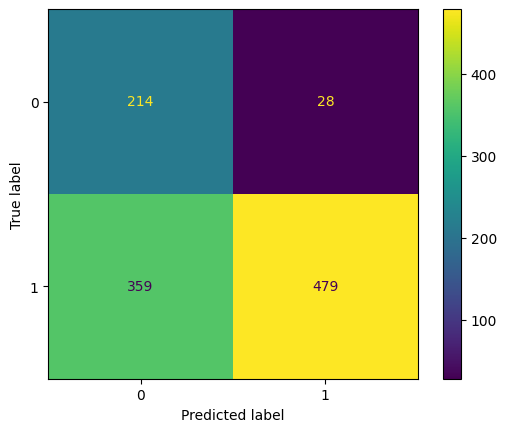

In [174]:
manualStory = manualStory2
asrStory = asrStory2

manualStoryClean, asrStoryClean = removeNANvalues(manualStory, asrStory)
manualStoryClean, asrStoryClean = removeNANvalues(manualStory, asrStory)
mcc = matthews_corrcoef(manualStoryClean, asrStoryClean)
cm = confusion_matrix(manualStoryClean, asrStoryClean)
print('MCC =', mcc)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [160]:
# from performance_metrics import getEvaluationMetrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, matthews_corrcoef, roc_auc_score, confusion_matrix, f1_score


def getEvaluationMetrics(title, y_true, y_pred):

    size = "N=" + str(len(y_true))
    acc = "Acc=" + str(round(accuracy_score(y_true, y_pred),3))
    prec = "Prec=" + str(round(precision_score(y_true, y_pred),3))
    recall = "Recall=" + str(round(recall_score(y_true, y_pred),3))
    f1 = "F1=" + str(round(f1_score(y_true, y_pred),3))
    mcc = "MCC=" + str(round(matthews_corrcoef(y_true, y_pred),3))
    auc = "AUC=" + str(round(roc_auc_score(y_true, y_pred),3))

    return "    ".join([title, size, acc, prec, recall, f1, mcc, auc])

getEvaluationMetrics('story_1', manualStoryClean, asrStoryClean)

'story_1    N=1080    Acc=0.642    Prec=0.945    Recall=0.572    F1=0.712    MCC=0.381    AUC=0.728'

File-level analysis

In [67]:
manualStory1DFSel = manualStory1DF.dropna()
print(manualStory1DFSel.index)
manualStory1SelMatrix = manualStory1DFSel.to_numpy()
manualStory1DFSelIndex = list(manualStory1DFSel.index)

fileScoresManual = [np.sum(x) for x in manualStory1SelMatrix]

Index(['SMVCS', 'XSWMB', 'YVBRP', 'Z2BYD', 'ZDPNZ'], dtype='object')


In [66]:
asrStory1DFSel = asrStory1DF.dropna().loc[manualStory1DFSelIndex,:]
print(asrStory1DFSel.index)
asrStory1SelMatrix = asrStory1DFSel.to_numpy()

fileScoresAutomatic = [np.sum(x) for x in asrStory1SelMatrix]

Index(['SMVCS', 'XSWMB', 'YVBRP', 'Z2BYD', 'ZDPNZ'], dtype='object')


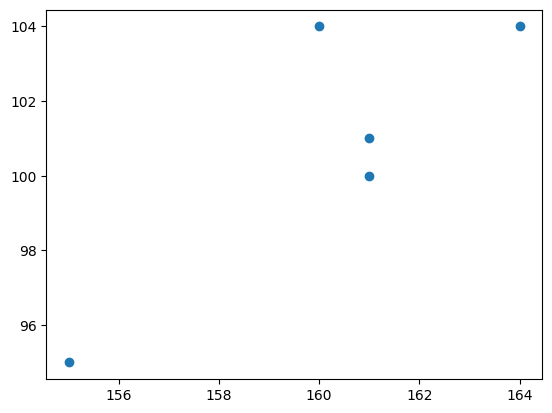

-411.54672897196264


In [70]:
# importing package 
import matplotlib.pyplot as plt 
  
# create data 
x = fileScoresManual
y = fileScoresAutomatic
  
# plot line 
plt.scatter(x, y) 
plt.show()

from sklearn.metrics import r2_score
print(r2_score(x,y))


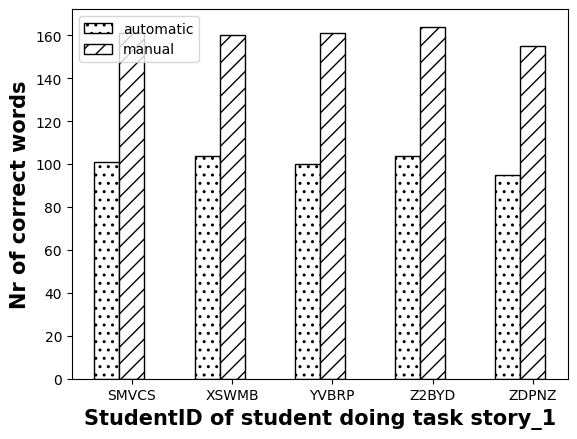

In [103]:
# importing package 
import matplotlib.pyplot as plt 
  
# create data 
x = list(asrStory1DFSel.index)
y1 = fileScoresAutomatic
y2 = fileScoresManual

# Set position on horizontal axis
barWidth=0.25
br1 = np.arange(len(y1)) 
br2 = [x + barWidth for x in br1]
  
# plot line 
plt.bar(br1, y1, color='white', edgecolor='black', width = barWidth, label='automatic', hatch='..') # Automatic Total score for each file
plt.bar(br2, y2, color='white', edgecolor='black', width = barWidth, label='manual', hatch='//') # Manual Total score for each file
# plt.plot(x, y2, color='orange') # Manual Total score for each file

# Adding Xticks 
plt.xlabel('StudentID of student doing task story_1', fontweight ='bold', fontsize = 15) 
plt.ylabel('Nr of correct words', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(y1))], list(asrStory1DFSel.index))

plt.legend()
plt.show()


Incorrect prompt analysis

- Are there prompts that are always incorrect?

In [17]:
manualStory2Clean, asrStory2Clean = removeNANvalues(manualStory2, asrStory2)
matthews_corrcoef(manualStory2Clean, asrStory2Clean)

Nr values with NAN: 35460 35460
Nr values without NAN: 1080 1080


0.3809032889086343

In [18]:
manualStory3Clean, asrStory3Clean = removeNANvalues(manualStory3, asrStory3)
matthews_corrcoef(manualStory3Clean, asrStory3Clean)

Nr values with NAN: 33884 33884
Nr values without NAN: 1032 1032


0.29877687613706